In [1]:
# CODTECH Internship Task-2
## Deep Learning Model with Tensorflow for Plant Disease Image Classification
#Name:** Shaunak Damodar Sinai Kunde  
#Internship:** CodTech IT Solutions Pvt Ltd  
#Task:** Download dataset using Kaggle API, Preprocessing,
#Transfer Learning, Training, Evaluation, Saving Model

In [2]:
!kaggle datasets download -d emmarex/plantdisease -p ./data
!unzip -q ./data/plantdisease.zip -d ./data/plant_disease

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
pip install pandas scikit-learn tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/331.9 MB 2.4 MB/s eta 0:02:19
   ---------------------------------------- 0.2/331.9 MB 3.1 MB/s eta 0:01:48
   ---------------------------------------- 0.4/331.9 MB 2.5 MB/s eta 0:02:11
   ---------------------------------------- 0.5/331.9 MB 2.7 MB/s eta 0:02:02
   ---------------------------------------- 0.6/331.9 MB 2.5 MB/s eta 0:02:12
   ---------------------------------------- 0.8/331.9 MB 2.7 MB/s eta 0:02:04
   ---------------------------------------- 0.9/331.9 MB 2.6 MB/s eta 0:02:06
   ---------------------------------------- 1.1/331.9 MB 2.8 MB/s eta 0:01:59
   ---------------------------------------- 1.2/331.9 MB 2.9 MB/s eta 0:01:56
   ---------------------------------------- 1.4/331.9 MB 3.0 MB/s eta 0:01:52
   ---------------------------------------- 1.5/331.9 MB 3.0 MB/s eta 0:01:50
   ---------------------------------------- 1.7/331.9 MB 3.1 MB/s eta 0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [6]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import os

In [16]:
!pip install kaggle

   ---------------------------------------- 0.0/181.2 kB ? eta -:--:--
   -------- ------------------------------ 41.0/181.2 kB 960.0 kB/s eta 0:00:01
   --------------------------------- ------ 153.6/181.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 181.2/181.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Cell 2: Copy Kaggle json
# import os, shutil

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

shutil.copy("C:/Users/kunde/Downloads/kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

print("✅ kaggle.json copied successfully!")


✅ kaggle.json copied successfully!


In [22]:
# Cell 3: Kaggle API setup and dataset download
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Make data folder
os.makedirs("./data", exist_ok=True)

# Authenticate Kaggle API (needs kaggle.json in ~/.kaggle or C:\Users\<user>\.kaggle)
api = KaggleApi()
api.authenticate()

# Download and unzip dataset
api.dataset_download_files('emmarex/plantdisease', path='./data', unzip=True)

print("✅ Dataset downloaded and extracted!")

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
✅ Dataset downloaded and extracted!


In [24]:
# Cell 4: Verify dataset structure
import os

for root, dirs, files in os.walk("./data", topdown=True):
    level = root.replace("./data", "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 4 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")

data/
    plantdisease/
    PlantVillage/
        Pepper__bell___Bacterial_spot/
            0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
            006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG
            00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG
            01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
            0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
        Pepper__bell___healthy/
            00100ffa-095e-4881-aebf-61fe5af7226e___JR_HL 7886.JPG
            00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG
            002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG
            00726ad4-2569-46ce-9d4e-dbf82b14bd94___JR_HL 8686.JPG
            0119205b-cfac-4322-be37-dcc401fcfa11___JR_HL 8527.JPG
        PlantVillage/
            Pepper__bell___Bacterial_spot/
                0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
                006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3

In [25]:
# Cell 5: Basic image preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    './data/PlantVillage',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    './data/PlantVillage',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print("✅ Data generators ready!")

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.
✅ Data generators ready!


In [ ]:
# Cell 6: Build CNN model
import tensorflow as tf
from tensorflow.keras import layers, models

num_classes = train_generator.num_classes

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\kunde\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Cell 7 – Build Transfer Learning Model_Shaunak
# from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load pre-trained MobileNetV2 (without top classifier)
base_model = MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze base model (do not train its weights initially)
base_model.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # num_classes defined earlier
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,016 (9.25 MB)

 Trainable params: 166,032 (648.56 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [29]:
#Cell 8 – Train with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,        # much smaller, usually 2–3 epochs is enough
    callbacks=[early_stop]
)

Epoch 1/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 200s 189ms/step - accuracy: 0.5312 - loss: 1.2503 - val_accuracy: 0.2109 - val_loss: 2.6494
Epoch 2/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 187s 181ms/step - accuracy: 0.5511 - loss: 1.0210 - val_accuracy: 0.1846 - val_loss: 4.0427
Epoch 3/5
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 188s 182ms/step - accuracy: 0.5573 - loss: 0.9672 - val_accuracy: 0.1691 - val_loss: 4.5690


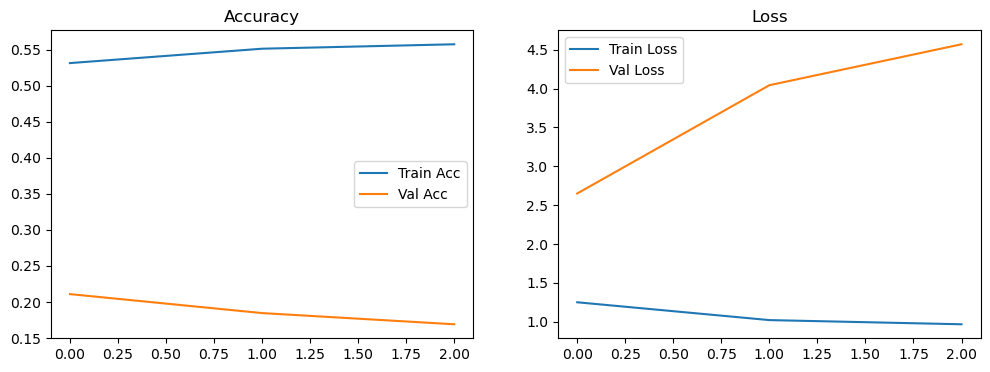

In [30]:
#Cell 9 – Plot Accuracy & Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128,128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # 80% for training
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # 20% for validation
    shuffle=False
)

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


In [ ]:
#Cell 10 – Evaluate on Test Set
# test_loss, test_acc = model.evaluate(val_generator)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

258/258 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - accuracy: 0.2109 - loss: 2.6494
✅ Test Accuracy: 21.09%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


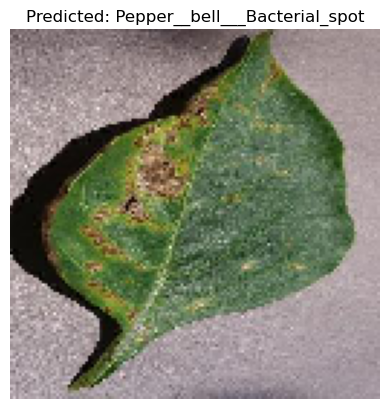

In [ ]:
#Cell 11.1 – Make Predictions
import numpy as np
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Example: predict on one batch from validation generator
sample_img, sample_label = next(val_generator)
pred = model.predict(sample_img)

# Predict first image in the batch
pred_class = np.argmax(pred[0])

plt.imshow(sample_img[0])
plt.title(f"Predicted: {class_labels[pred_class]}")
plt.axis("off")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


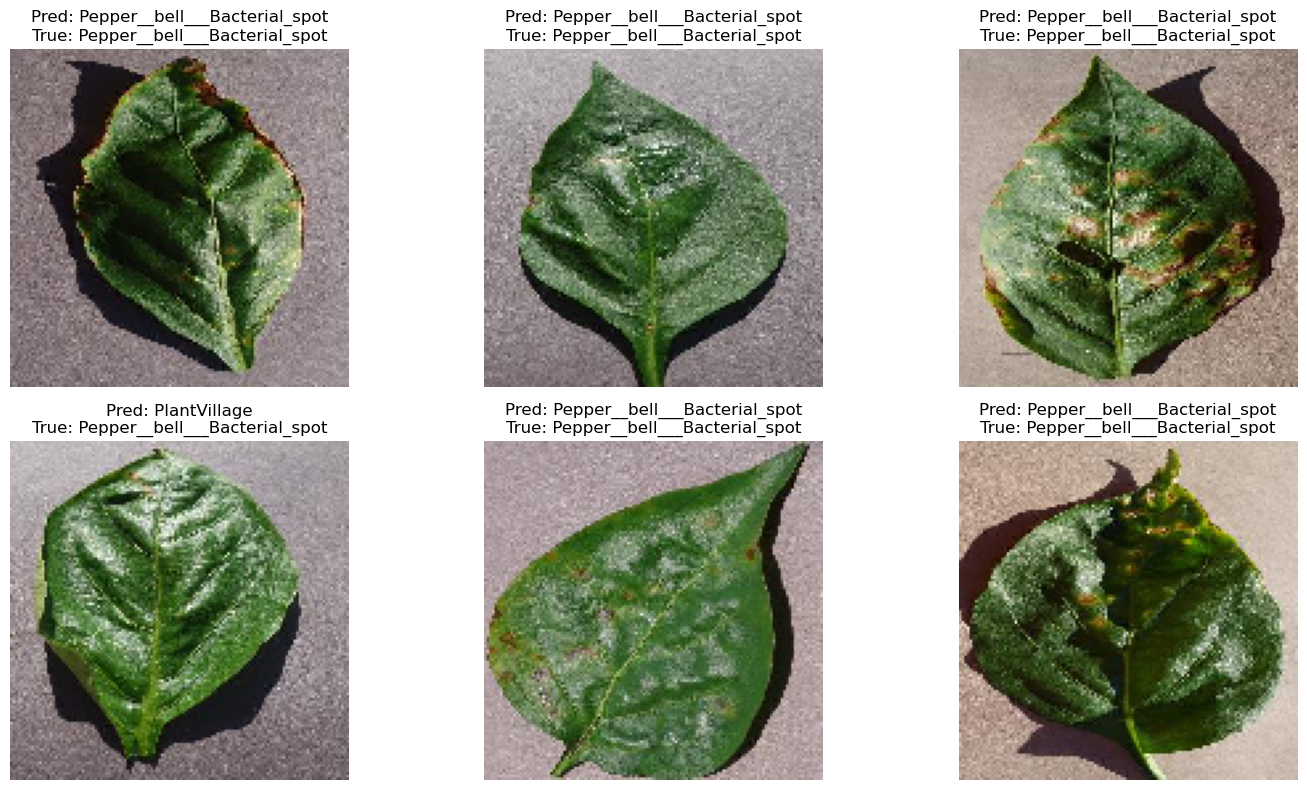

In [ ]:
# Cell 11.2 – Make Predictions on Multiple Validation Images_Shaunak
import numpy as np
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Predict on one batch of images
sample_imgs, sample_labels = next(val_generator)
preds = model.predict(sample_imgs)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

# Display first 6 images with predicted vs actual labels
plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample_imgs[i])
    plt.title(f"Pred: {class_labels[pred_classes[i]]}\nTrue: {class_labels[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()